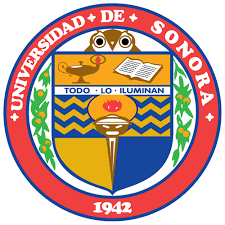



# **Actividad 10**

*Solución Numérica de Ecuaciones Diferenciales Parciales.*

Iveth Rocio Navarro Lopez



---

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

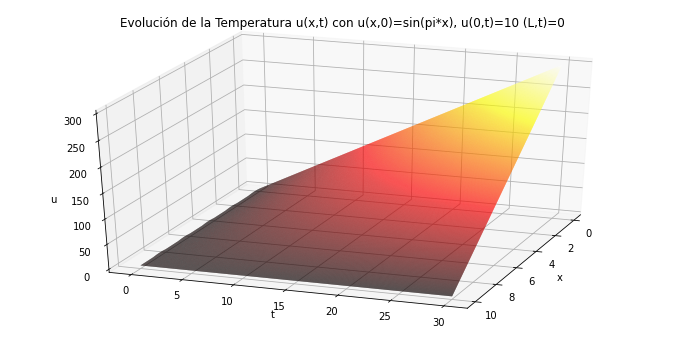

In [8]:
def diffi(u,t):
  #inicialmente en toda la barra vale 0
  dudt=np.zeros(x0.shape)
  #Condiciones a la frontera
  dudt[0]=10
  dudt[-1]=0
  kappa=100
  
  #Calculamos la temperatura en los puntos interiores de 1 a N-1
  for i in range(1,N-2):
    #dudt[i]=kappa*(u[i+1]-2*u[i]+u[i-1])/h**2
    dudt[i] = kappa*((u[i + 1] - 2*u[i] + u[i - 1] )/ (h**2) ) 
  return dudt

  #Longitud de la barra
a=0
b=10
#Tiempo inicial y final
t0=0.0
tf=30.0
#Coeficiente de dilatacion termica


#Numeros de puntos en la direccion x que consideramos
N=400

#Tamaño del delta x
h = (b-a)/(N-1)

# Los puntos en el dominio x
x = np.linspace(a, b, N);

# La condición inicial u(x,0)=sin(pi*x)
x0 = np.sin(np.pi*x)
x0[x0 < 0] = 0
#x0=np.zeros(N)
#x0[-1]=10

# Puntos de integración en el tiempo
tspan = np.linspace(t0, tf, 800);

# Solución usando scipy.integrate.odeint
sol = odeint(diffi, x0, tspan)


# graficamos en 3D
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol, cmap='hot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=30, azim=20)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=10 (L,t)=0')
plt.show()



---
**Actividad 10.1**


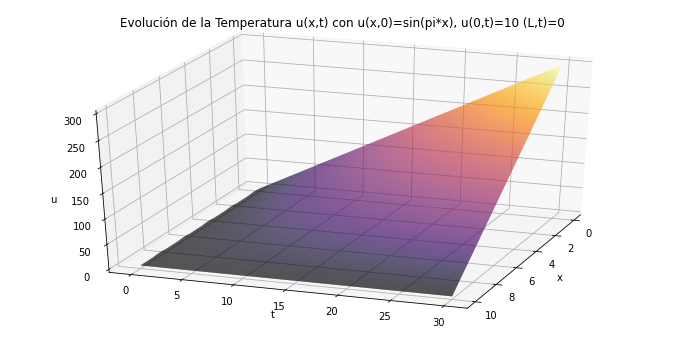

In [17]:
#Para el caso a) con Odeint:
def diffi(u,t):
  dudt=np.zeros(x0.shape)
  #Condiciones a la frontera
  dudt[0]=10
  dudt[-1]=0
  kappa=100
  
  #Temperatura en los puntos interiores de 1 a N-1
  for i in range(1,N-2):
    #dudt[i]=kappa*(u[i+1]-2*u[i]+u[i-1])/h**2
    dudt[i] = kappa*((u[i + 1] - 2*u[i] + u[i - 1] )/ (h**2) ) 
  return dudt

#Dimensiones de la barra
a=0
b=10

t0=0.0 #t inicial
tf=30.0 #t final

N=400 # # de puntos

h = (b-a)/(N-1) #Tamaño de detlta x

x = np.linspace(a, b, N);

# La condición inicial u(x,0)=sin(pi*x)
x0 = np.sin(np.pi*x)
x0[x0 < 0] = 0

tspan = np.linspace(t0, tf, 800);

# Solución usando scipy.integrate.odeint
sol = odeint(diffi, x0, tspan)


# graficando en 3D
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol, cmap='inferno', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=30, azim=20)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=10 (L,t)=0')
plt.show()

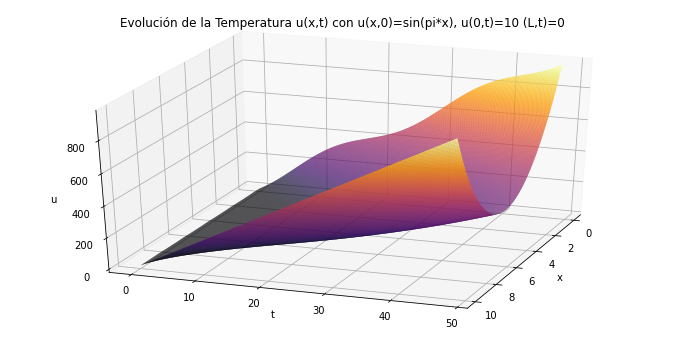

In [18]:
#Para el caso b) con Odeint:
def diffi_b(u,t):
  #inicialmente en toda la barra vale 20
  dudt=np.zeros(x0.shape)+20
  #Condiciones a la frontera
  dudt[0]=20 + 10 *np.sin(np.pi*t/12)
  dudt[-1]=20
  kappa=0.25
  #Temperatura en los puntos interiores de 1 a N-1
  for i in range(1,N-1):
    #dudt[i]=kappa*(u[i+1]-2*u[i]+u[i-1])/h**2
    dudt[i] = kappa*((u[i + 1] - 2*u[i] + u[i - 1] )/ (h**2) )
  return dudt

#Dimensiones de la barra
a=0
b=10

t0=0.0 #t inicial
tf=48.0 #t final

N=400

h = (b-a)/(N-1) #Tamaño de delta x

x = np.linspace(a, b, N);

# La condición inicial u(x,0)=sin(pi*x)
x0 = np.sin(np.pi*x)
x0[x0 < 0] = 0

tspan = np.linspace(t0, tf, 400);

# Solución usando scipy.integrate.odeint
sol = odeint(diffi_b, x0, tspan)

# graficando en 3D
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol, cmap='inferno', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=30, azim=20)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=10 (L,t)=0')
plt.show()

dt/dx**2 < 0.5? 0.002


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'lw'


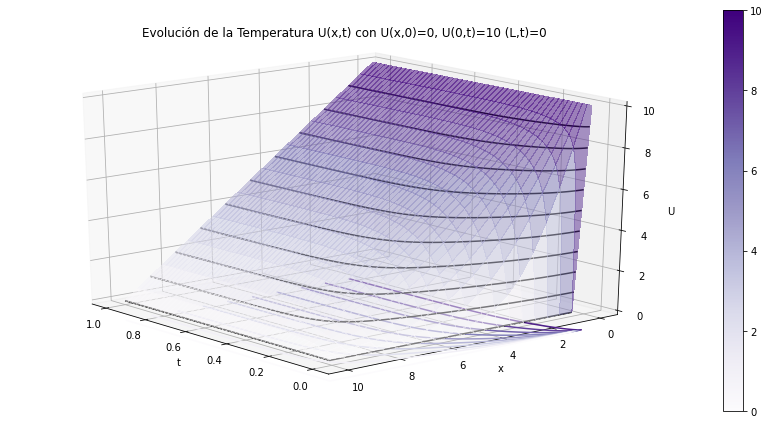

In [19]:
#Para el caso a) de diferencias finitas:

M=21 #pasos en x
N=2001 #pasos en t

x0=0
xL=10 

t0=0
tf=1.0

dx= (xL - x0) / (M - 1) # tamaño diferenciacion en x
dt = (tf - t0) / (N - 1) # tamaño de la diferenciacion en t
print('dt/dx**2 < 0.5?', dt/dx**2)
kappa=100.0 #difusión térmica

alpha=(kappa*dt)/(dx**2) 
# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tf, N)

# Definiendo el tamaño de la matriz de la solución e iniciando con ceros
U = np.zeros((M, N))

U[:,0] = np.zeros(xspan.shape)

U[0, :] = 10
U[-1, :] = 0.0

for k in range(0, N-1): # Avance en el tiempo
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Definiendo malla para graficar
T, X = np.meshgrid(tspan, xspan)


fig = plt.figure(figsize=(12,6))
# Graficando una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Purples',
                       linewidth=0.01, antialiased=False, alpha=0.5)

ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Purples", linestyles="solid", offset=-1)


# Graficando una tabla de valores 
m = plt.cm.ScalarMappable(cmap='Purples')

m.set_array(U)
plt.colorbar(m)

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) con U(x,0)=0, U(0,t)=10 (L,t)=0')

ax.view_init(elev=20, azim=140)

plt.tight_layout()
plt.show()

dt/dx**2 < 0.5? 0.096


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: The following kwargs were not used by contour: 'lw'


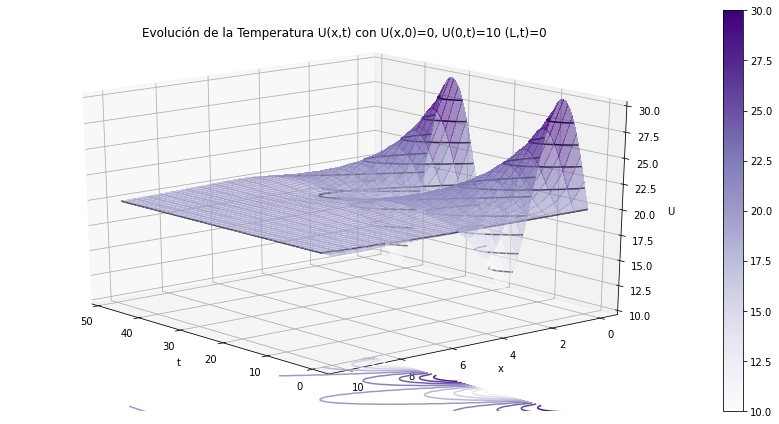

In [20]:
#Caso b) para diferencias finitas:
M=21 #pasos en x
N=2001 #pasos en t

x0=0
xL=10 

t0=0
tf=48.00

dx= (xL - x0) / (M - 1) # tamaño diferenciación en x
dt = (tf - t0) / (N - 1) # tamaño de la diferenciación en t
print('dt/dx**2 < 0.5?', dt/dx**2)
kappa=0.25 #difusion termica

alpha=(kappa*dt)/(dx**2) #coeficiente de la ecuación
# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tf, N)

# Definiendo el tamaño de la matriz de la solución e iniciando con ceros
U = np.zeros((M, N))


U[:,0] = np.zeros(xspan.shape)+20
#Condiciones de frontera
U[0, :] =20 + 10*np.sin(np.pi*tspan/(12))
U[-1, :] = 20.0

for k in range(0, N-1): # Avance en el tiempo
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Definiendo malla para graficar
T, X = np.meshgrid(tspan, xspan)


fig = plt.figure(figsize=(12,6))
# Graficando una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Purples',
                       linewidth=0.01, antialiased=False, alpha=0.5)


ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Purples", linestyles="solid", offset=-1)


m = plt.cm.ScalarMappable(cmap='Purples')

m.set_array(U)
plt.colorbar(m)

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) con U(x,0)=0, U(0,t)=10 (L,t)=0')

# Punto del observador 
ax.view_init(elev=20, azim=140)

plt.tight_layout()
plt.show()



---
**Actividad 10.2**


dt/dx**2 < 0.5? 46.08


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: The following kwargs were not used by contour: 'lw'


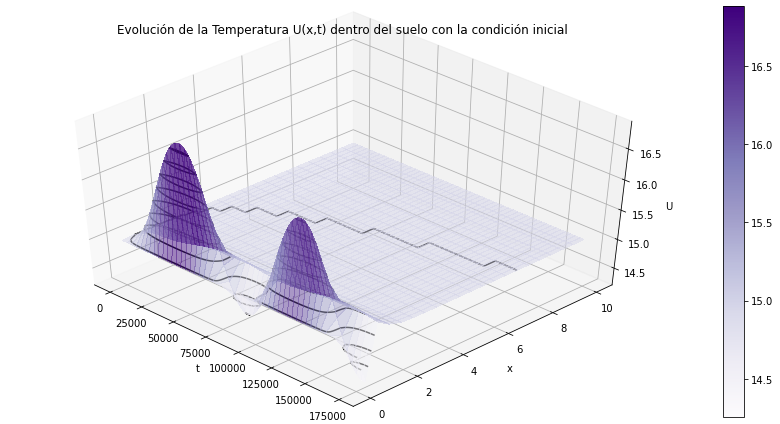

In [21]:
M = 21 # Número de puntos en el eje x
N = 15001 # Número de puntos en t

x0 = 0
xL = 10 # Profundidad a la que no cambia

t0 = 0
tf = 172800 #48 h

dx = (xL-x0) / (M-1) # tamaño discretización en x
dt = (tf-t0) / (N-1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 1*10**(-6) # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tf, N)

# Definiendo el tamaño de la matríz de la solución e iniciando con ceros
U = np.zeros((M, N))

#U[:, 0] = np.sin(np.pi*xspan)

U[:,0] = 15.0*np.ones(xspan.shape)

# Condiciones a la Frontera tipo Dirichlet
#U[0, :] = 20 + 10*np.sin(np.pi*t/12.0)
#U[-1, :] = 20.0

# Método de diferencias finitas Ec. del Calor
for k in range(0, N-1): # Avance en el tiempo
    # Condiciones a la frontera 
    t=k*dt
    U[0, :] = 15 + 20*np.sin(2*np.pi*t/86400)
    U[-1, :] = 15
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Definiendo malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Graficando una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Purples',
                       linewidth=0.01, antialiased=False, alpha=0.5)

ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Purples", linestyles="solid", offset=10)

m = plt.cm.ScalarMappable(cmap='Purples')
m.set_array(U)
plt.colorbar(m)

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) dentro del suelo con la condición inicial ')

ax.view_init(elev=45, azim=-45)


plt.tight_layout()
plt.show()